In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from thunder import Colorize
image = Colorize.image
sns.set_style('darkgrid')
sns.set_context('notebook')

In [1]:
data = tsc.loadImages('/mnt/downloads/20150417Aligned/1/', inputFormat='tif')

In [2]:
data

Images
nrecords: 400
dtype: None (inspect to compute)
dims: None (inspect to compute)

In [6]:
from numpy import random
from scipy.ndimage.filters import gaussian_filter
t = 500
dx = gaussian_filter(random.randn(t), 50) * 25
dy = gaussian_filter(random.randn(t), 50) * 25

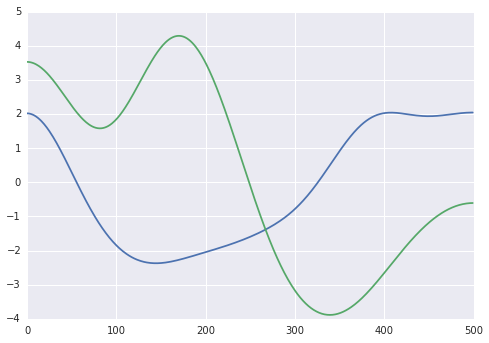

In [7]:
plt.plot(dx);
plt.plot(dy);

In [8]:
from scipy.ndimage import shift
shifted = data.apply(lambda (k, v): (k, shift(v, (dx[k], dy[k]), mode='nearest', order=0)))

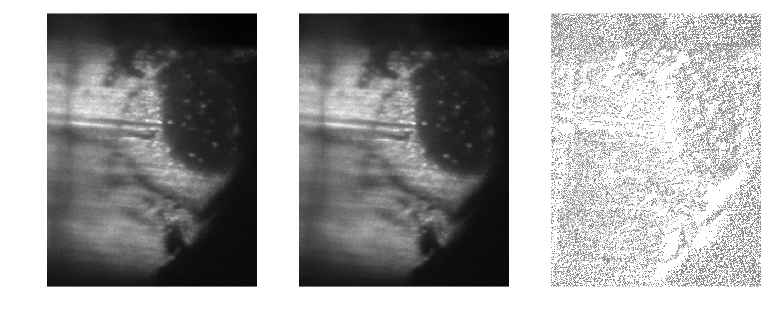

In [9]:
im1 = data[0]
im2 = shifted[0]

sns.set_context('poster')
plt.subplot(1, 3, 1)
image(im1)
plt.subplot(1, 3, 2)
image(im2)
plt.subplot(1, 3, 3)
image(im1 - im2, clim=(-200, 200))
sns.set_context('notebook')

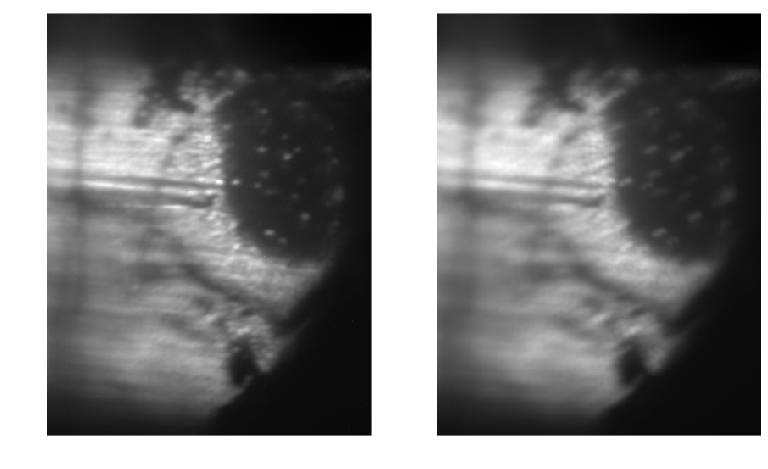

In [10]:
sns.set_context('poster')
plt.subplot(1, 2, 1)
image(data.mean())
plt.subplot(1, 2, 2)
image(shifted.mean())
sns.set_context('notebook')

In [11]:
from thunder import Registration
reg = Registration('crosscorr')
reg.prepare(shifted, startIdx=0, stopIdx=500);

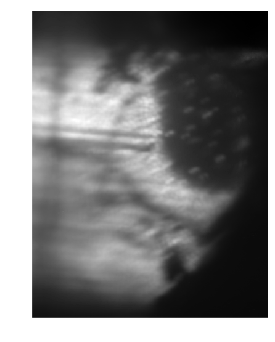

In [12]:
image(reg.reference)

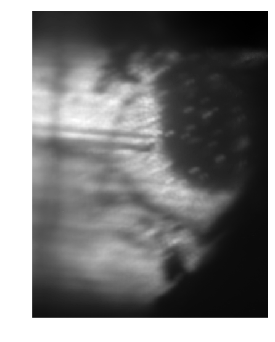

In [13]:
ref = shifted.filterOnKeys(lambda k: k > 0 and k < 500).mean()
reg.prepare(ref)
image(reg.reference)

In [14]:
model = reg.fit(shifted)

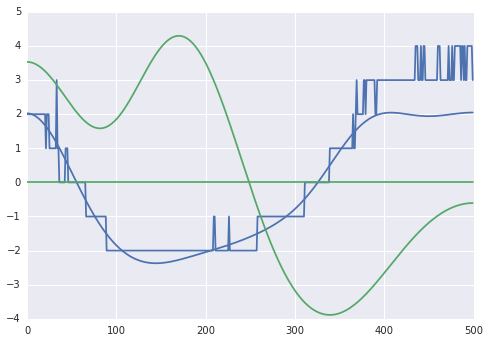

In [15]:
clrs = sns.color_palette('deep')
plt.plot(model.toArray()[:,0], color=clrs[0])
plt.plot(dx, color=clrs[0])
plt.plot(model.toArray()[:,1], color=clrs[1])
plt.plot(dy, color=clrs[1]);

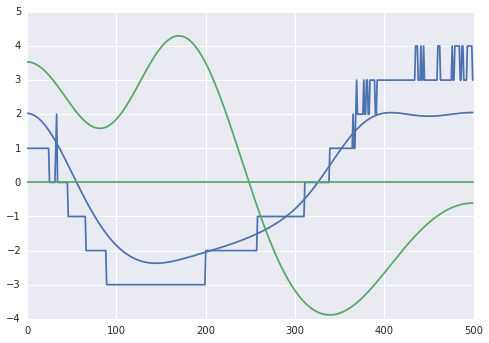

In [16]:
reg.prepare(data, startIdx=0, stopIdx=500)
model = reg.fit(shifted)
plt.plot(model.toArray()[:,0], color=clrs[0])
plt.plot(dx, color=clrs[0])
plt.plot(model.toArray()[:,1], color=clrs[1])
plt.plot(dy, color=clrs[1]);

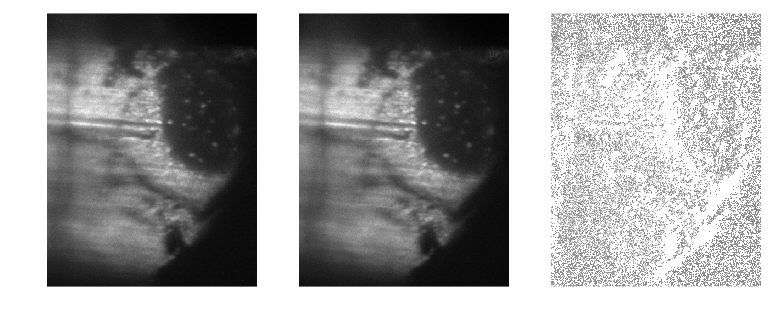

In [17]:
corrected = model.transform(shifted)
im1 = data[0]
im2 = corrected[0]

sns.set_context('poster')
plt.subplot(1, 3, 1)
image(im1)
plt.subplot(1, 3, 2)
image(im2)
plt.subplot(1, 3, 3)
image(im1 - im2, clim=(-200, 200))
sns.set_context('notebook')

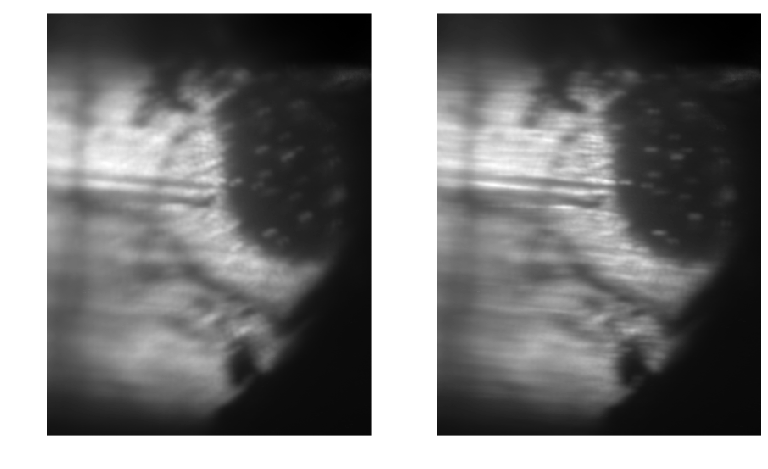

In [18]:
sns.set_context('poster')
plt.subplot(1, 2, 1)
image(shifted.mean())
plt.subplot(1, 2, 2)
image(corrected.mean())
sns.set_context('notebook')

In [19]:
model.save('model.json')
modelreloaded = Registration.load('model.json')

In [20]:
corrected 

Images
nrecords: 500
dtype: uint16
dims: min=(0, 0), max=(497, 382), count=(498, 383)

In [3]:
ts = data.toSeries()
ts=ts.toTimeSeries()
ts.cache();

In [4]:
from thunder import PCA, RegressionModel
norm=ts.normalize(baseline='percentile')

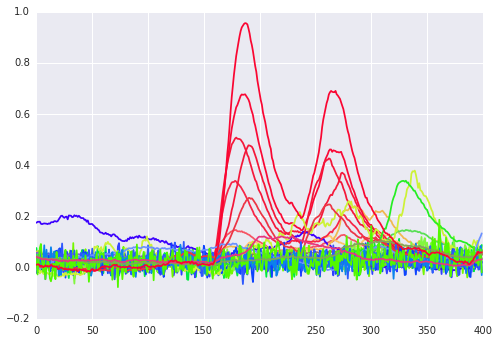

In [5]:
from thunder import KMeans, Colorize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
modelK=KMeans(k=30).fit(norm)
newclrs = Colorize.optimize(modelK.centers, asCmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

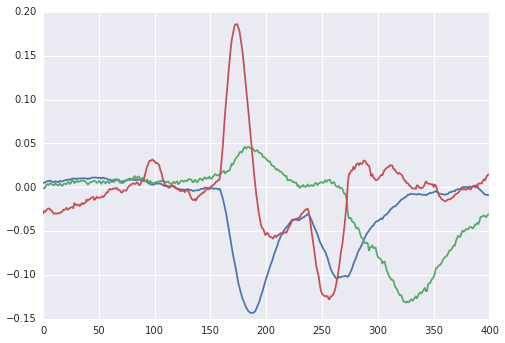

In [6]:
from thunder import PCA
modelcc=PCA(k=3).fit(norm)
plt.plot(modelcc.comps.T);

In [7]:
imgs = modelcc.scores.pack()
from thunder import Colorize
from numpy import amax
maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs)
sns.set_style('white')
plt.imshow(maps);

TypeError: __init__() got an unexpected keyword argument 'totype'

<matplotlib.colorbar.Colorbar instance at 0x7f1cc199a1b8>

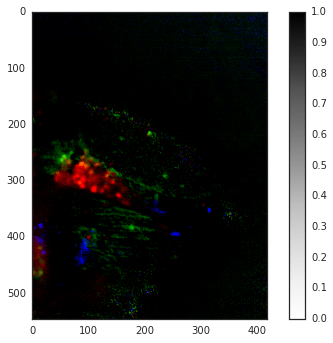

In [36]:
maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2, vmin=0.001).transform(imgs)
sns.set_style('white')
plt.imshow(maps);
plt.colorbar()

In [17]:
from thunder import RegressionModel
import numpy as np
from numpy import sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
test = np.zeros((3,400),dtype=np.int)
test[0,154:184]=1
test[1,234:264]=1
test[2,304:314]=1
model = RegressionModel.load(test, "linear")
results = model.fit(norm)

In [18]:
results.select('betas').first()

((0, 0), array([-0.00460792, -0.00189254,  0.01127294]))

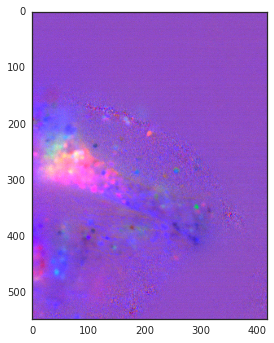

In [19]:
betas=results.select('betas').pack()
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas)
plt.imshow(maps)

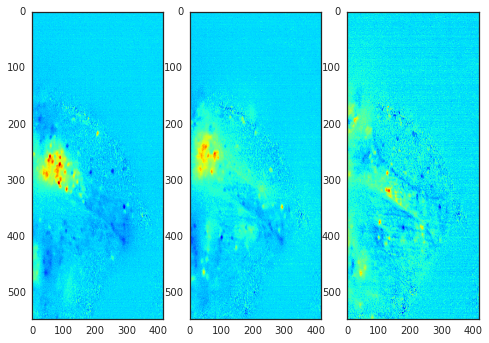

In [27]:
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from numpy import amin, amax, ravel
vmin = amin(betas)
vmax = amax(betas)
fig = figure(dpi=300)
plt.subplots(1, 3, sharex=True, sharey=True)
for i in range(0,3):
    n=betas[i,]
    plt.subplot(1, 3, i+1)
    plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')

<matplotlib.colorbar.Colorbar instance at 0x7f1cc267cc20>

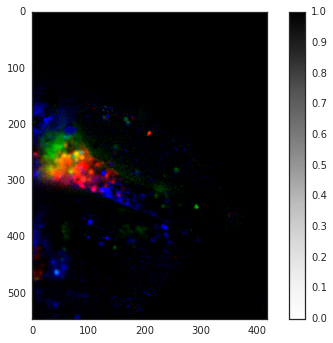

In [29]:
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], vmin=0.02, scale=2).transform(betas)
plt.imshow(maps)
plt.colorbar()

In [35]:
modelcc.scores.first()

((0, 0), array([ 0.00102367,  0.00116762,  0.00049436]))

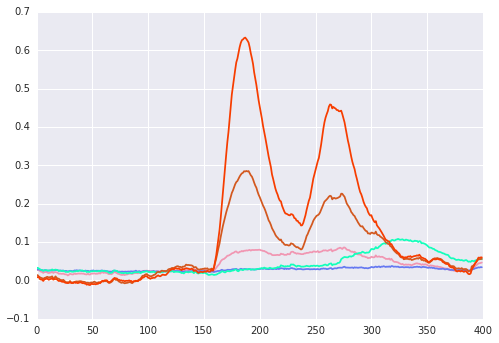

In [37]:
modelK=KMeans(k=5).fit(norm)
newclrs = Colorize.optimize(modelK.centers, asCmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);